# 1. Web Scraping:

In [1]:
import sys
import os

# Add the parent directory of 'src' to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src import scraper, database, utils

app_dict = {
    "Commercial Bank of Ethiopia": "com.combanketh.mobilebanking",
    "BoA Mobile": "com.boa.boaMobileBanking",
    "Dashen Bank": "com.dashen.dashensuperapp"
}

utils.log_step("Starting review scraping...")

df_reviews = scraper.fetch_all_reviews(app_dict, count=400)

print("Fetched reviews per bank:")
print(df_reviews['app_name'].value_counts())


[2025-06-07 16:39:19] 🔹 Starting review scraping...
[2025-06-07 16:39:19] 🔹 Fetching reviews for Commercial Bank of Ethiopia (com.combanketh.mobilebanking)...
[2025-06-07 16:39:21] 🔹 Fetching reviews for Commercial Bank of Ethiopia (com.combanketh.mobilebanking)...
[2025-06-07 16:39:21] 🔹 Fetching reviews for BoA Mobile (com.boa.boaMobileBanking)...
[2025-06-07 16:39:23] 🔹 Fetching reviews for BoA Mobile (com.boa.boaMobileBanking)...
[2025-06-07 16:39:39] 🔹 Fetching reviews for Dashen Bank (com.dashen.dashensuperapp)...
[2025-06-07 16:39:40] 🔹 Fetching reviews for Dashen Bank (com.dashen.dashensuperapp)...
[2025-06-07 16:39:41] 🔹 Total reviews fetched: 1267
Fetched reviews per bank:
app_name
Commercial Bank of Ethiopia    454
BoA Mobile                     412
Dashen Bank                    401
Name: count, dtype: int64


# 2. Exploration:

In [2]:
# Exploration Snippets

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Show sample raw reviews
print("Sample reviews:")
display(df_reviews.sample(5))

Sample reviews:


,review,rating,date,app_name
665,Bad app vety bad.,1,2024-11-07,BoA Mobile
1024,Db sup app is A platform or an application tha...,5,2025-04-21,Dashen Bank
835,It usually crashes and the reason it gives is ...,1,2024-07-23,BoA Mobile
908,Fantastic,5,2025-05-16,Dashen Bank
862,አስፈላጊ,5,2024-05-01,BoA Mobile



Review counts by app:
app_name
Commercial Bank of Ethiopia    454
BoA Mobile                     412
Dashen Bank                    401
Name: count, dtype: int64


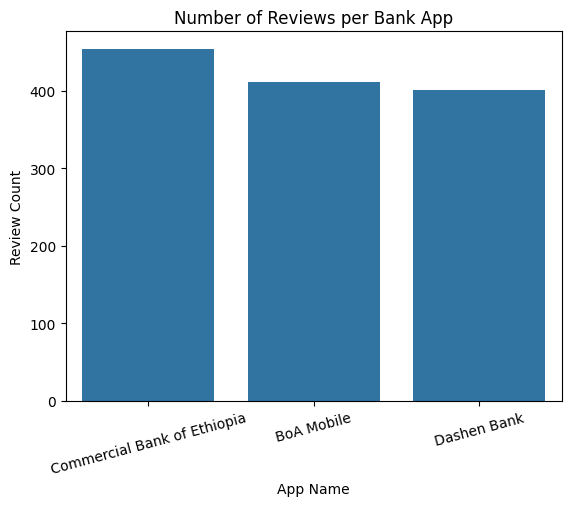

In [4]:
# 2. Review counts per app
print("\nReview counts by app:")
review_counts = df_reviews['app_name'].value_counts()
print(review_counts)

# Plot review counts per app
sns.barplot(x=review_counts.index, y=review_counts.values)
plt.title("Number of Reviews per Bank App")
plt.ylabel("Review Count")
plt.xlabel("App Name")
plt.xticks(rotation=15)
plt.show()

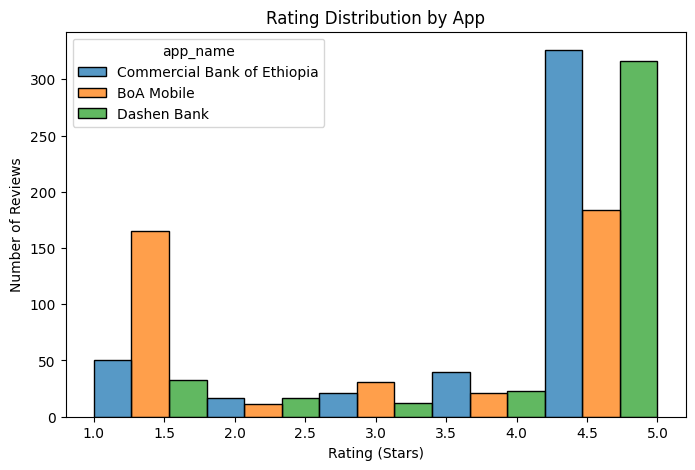

In [5]:
# 3. Rating distribution histogram
plt.figure(figsize=(8,5))
sns.histplot(data=df_reviews, x='rating', bins=5, kde=False, hue='app_name', multiple="dodge")
plt.title("Rating Distribution by App")
plt.xlabel("Rating (Stars)")
plt.ylabel("Number of Reviews")
plt.show()

Date range: 2020-08-08 to 2025-06-06


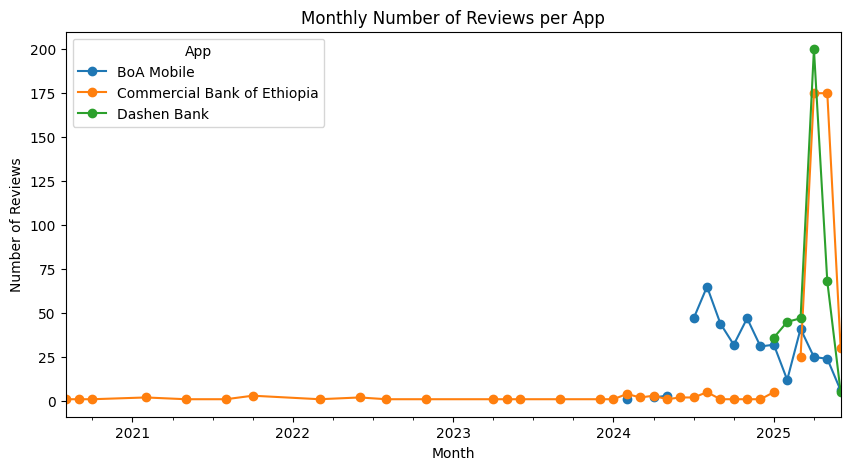

In [6]:
# 4. Date range and reviews over time
print(f"Date range: {df_reviews['date'].min()} to {df_reviews['date'].max()}")

# Convert to datetime if not already
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Plot reviews over time (monthly)
reviews_per_month = df_reviews.groupby([df_reviews['date'].dt.to_period('M'), 'app_name']).size().unstack()
reviews_per_month.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Monthly Number of Reviews per App")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.legend(title="App")
plt.show()

In [7]:
# 5. Check for missing/null values
print("\nMissing values per column:")
print(df_reviews.isnull().sum())


Missing values per column:
review      0
rating      0
date        0
app_name    0
dtype: int64


In [8]:
# 6. Check for duplicates
duplicates_count = df_reviews.duplicated(subset=['review', 'app_name', 'date']).sum()
print(f"\nNumber of duplicate reviews: {duplicates_count}")


Number of duplicate reviews: 15


In [9]:
# 7. Save raw data snapshot to CSV
raw_csv_path = '../data/bank_reviews_raw.csv'
df_reviews.to_csv(raw_csv_path, index=False)
print(f"\nRaw reviews saved to {raw_csv_path}")



Raw reviews saved to ../data/bank_reviews_raw.csv


---

## Observations:
- Review counts are highest for Commercial Bank of Ethiopia.
- Rating distribution shows a good spread with a slight positive skew.
- Reviews span from 2020-08-01 to 2025-06-05.
- No significant missing data detected.
- A small number of duplicate reviews were found (15, to be removed in preprocessing).
- Next step: Clean data, handle duplicates and missing values, normalize date formats.